# **1. Install Library**

In [1]:
# ! pip install mlxtend==0.21.0

In [2]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value=100
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

# **2. Read Data**

## 2.1 unrar

In [5]:
# ! unrar x drive/MyDrive/Data_FastRNN.rar

## 2.2 read data main

In [7]:
import pandas as pd
data_main=pd.read_excel("data_fastrnn1.xlsx",header=[1],sheet_name='خبهمن')
data_main

,نماد,firm,date,تاریخ شمسی,داده ها از 90 تا 1400,اولين قيمت,بالاترين قيمت,كمترين قيمت,قيمت پاياني,ارزش معاملات,...,dps,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار
0,Bahman.Group,3,2011/03/02,1389/12/11,4406,2600,2669,2600,2665,10733900831,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,125.070955,NaN
1,Bahman.Group,3,2011/03/05,1389/12/14,4407,2720,2771,2710,2760,34961612481,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,125.446358,NaN
2,Bahman.Group,3,2011/03/06,1389/12/15,4408,2843,2843,2724,2820,54471566876,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,125.822496,NaN
3,Bahman.Group,3,2011/03/07,1389/12/16,4409,2735,2755,2710,2725,16925994843,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,126.199369,NaN
4,Bahman.Group,3,2011/03/08,1389/12/17,4410,2712,2834,2712,2806,32543743009,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,126.576979,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,Bahman.Group,3,2022/03/13,1400/12/22,6665,1718,1719,1671,1697,115499280263,...,377,120,14.633333,0.099039,8.211562,1335376.4,30.096101,1.167731e+07,121.357388,42000.0
2260,Bahman.Group,3,2022/03/14,1400/12/23,6666,1673,1719,1673,1697,68603812293,...,377,120,14.633333,0.099039,8.211562,1334776.9,29.929022,1.167140e+07,122.463734,42000.0
2261,Bahman.Group,3,2022/03/15,1400/12/24,6667,1677,1761,1677,1737,119951932762,...,377,120,14.633333,0.099039,8.211562,1337223.2,29.761546,1.166546e+07,122.833988,42000.0
2262,Bahman.Group,3,2022/03/16,1400/12/25,6668,1781,1823,1781,1821,354320314840,...,377,120,14.633333,0.099039,8.211562,1345018.2,29.593672,1.165950e+07,123.204977,42000.0


# **3. Preproceesing Data**

In [8]:
data_main.isna().sum()

نماد                      0
firm                      0
date                      0
تاریخ شمسی                0
داده ها از 90 تا 1400     0
اولين قيمت                0
بالاترين قيمت             0
كمترين قيمت               0
قيمت پاياني               0
ارزش معاملات              0
حجم معاملات               0
قيمت پيش گشايش            0
قيمت اولي                 0
آخرين قيمت                0
MA(5)                     4
MA(12)                   11
MA(26)                   25
EMA(12)                   0
EMA(26)                   0
MACD                     25
RSI                      14
dps                       0
eps                       0
p_e                       0
roa                       0
size                      0
شاخص کل                  13
تورم                     15
طلا                      15
نفت                      15
دلار                     12
dtype: int64

In [9]:
data_main_pre=data_main.fillna(0)
data_main_pre['lbl']=data_main_pre['قيمت پاياني']
data_main_pre.drop(['date','نماد','firm','داده ها از 90 تا 1400','تاریخ شمسی','قيمت اولي'],axis=1,inplace=True)
data_main_pre.drop('قيمت پاياني',axis=1,inplace=True)
data_main_pre

,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
0,2600,2669,2600,10733900831,4027793,161,2669,0.0,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,125.070955,0.0,2665
1,2720,2771,2710,34961612481,12666330,869,2771,0.0,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,125.446358,0.0,2760
2,2843,2843,2724,54471566876,19313495,600,2735,0.0,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,125.822496,0.0,2820
3,2735,2755,2710,16925994843,6211959,519,2713,0.0,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,126.199369,0.0,2725
4,2712,2834,2712,32543743009,11598108,690,2834,2744.4,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,126.576979,0.0,2806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,1718,1719,1671,115499280263,68077374,2032,1703,1756.4,1776.666667,1780.807692,...,120,14.633333,0.099039,8.211562,1335376.4,30.096101,1.167731e+07,121.357388,42000.0,1697
2260,1673,1719,1673,68603812293,40424412,1364,1691,1733.6,1762.833333,1773.769231,...,120,14.633333,0.099039,8.211562,1334776.9,29.929022,1.167140e+07,122.463734,42000.0,1697
2261,1677,1761,1677,119951932762,69057575,1831,1725,1730.0,1759.500000,1768.730769,...,120,14.633333,0.099039,8.211562,1337223.2,29.761546,1.166546e+07,122.833988,42000.0,1737
2262,1781,1823,1781,354320314840,194605032,2522,1823,1734.0,1763.916667,1770.115385,...,120,14.633333,0.099039,8.211562,1345018.2,29.593672,1.165950e+07,123.204977,42000.0,1821


In [10]:
data_final=data_main_pre

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
print("Original descriptives:")
display(data_final.describe().round(2))

print("\nMin-Max-scaled descriptives:")
scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()  #
scaler.fit(data_final)
data_scaled = scaler.transform(data_final)
df_scaled = pd.DataFrame(data_scaled, index=data_final.index, columns=data_final.columns)
display(df_scaled.describe().round(2))
data_normal=df_scaled


Original descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2264.00,2264.00,2264.00,2.264000e+03,2.264000e+03,2264.00,2264.00,2264.00,2264.00,2264.00,...,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00
mean,1871.36,1903.90,1835.78,5.272385e+10,2.922103e+07,1092.50,1866.96,1862.95,1855.96,1841.20,...,341.49,7.01,0.12,7.35,214449.64,24.57,2991965.60,73.42,29336.11,1871.44
std,649.82,660.78,634.41,1.402071e+11,8.066827e+07,1703.33,647.97,645.15,642.65,640.28,...,142.71,12.31,0.03,0.29,369121.16,14.29,3445078.07,30.88,11216.79,648.13
min,721.00,760.00,720.00,1.834380e+06,1.161000e+03,2.00,720.00,0.00,0.00,0.00,...,120.00,3.04,0.09,7.20,0.00,0.00,0.00,0.00,0.00,739.00
25%,1404.00,1430.00,1374.50,3.734249e+09,2.178884e+06,220.00,1409.75,1411.25,1411.12,1405.56,...,207.00,3.47,0.10,7.21,61500.70,12.15,982958.06,50.01,24797.75,1406.75
50%,1866.00,1900.00,1830.00,1.083540e+10,6.465673e+06,500.00,1859.00,1855.00,1853.00,1854.73,...,375.00,5.06,0.11,7.26,77455.50,21.64,1176375.01,62.95,30196.00,1871.00
75%,2180.00,2210.25,2150.00,3.631820e+10,1.830575e+07,1198.50,2178.00,2176.35,2182.52,2192.62,...,425.00,5.66,0.13,7.29,158050.90,36.29,4440628.66,95.30,42000.00,2181.25
max,5596.00,5596.00,5542.00,2.461132e+12,1.444620e+09,18182.00,5596.00,5346.60,4812.67,4275.42,...,651.00,162.12,0.19,8.21,1575762.00,63.17,12334149.58,180.04,44120.00,5596.00



Min-Max-scaled descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,...,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00
mean,0.24,0.24,0.23,0.02,0.02,0.06,0.24,0.35,0.39,0.43,...,0.42,0.02,0.31,0.15,0.14,0.39,0.24,0.41,0.66,0.23
std,0.13,0.14,0.13,0.06,0.06,0.09,0.13,0.12,0.13,0.15,...,0.27,0.08,0.27,0.28,0.23,0.23,0.28,0.17,0.25,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.14,0.14,0.00,0.00,0.01,0.14,0.26,0.29,0.33,...,0.16,0.00,0.13,0.01,0.04,0.19,0.08,0.28,0.56,0.14
50%,0.23,0.24,0.23,0.00,0.00,0.03,0.23,0.35,0.39,0.43,...,0.48,0.01,0.23,0.06,0.05,0.34,0.10,0.35,0.68,0.23
75%,0.30,0.30,0.30,0.01,0.01,0.07,0.30,0.41,0.45,0.51,...,0.57,0.02,0.41,0.10,0.10,0.57,0.36,0.53,0.95,0.30
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [12]:
data_ready = data_normal.copy()
lbl_ready=data_normal.iloc[:,-1]

print("_"*50)
print("data_final shape: {0}".format(data_ready.shape))
print("lbl_final shape: {0}".format(lbl_ready.shape))
print("_"*50)

__________________________________________________
data_final shape: (2264, 25)
lbl_final shape: (2264,)
__________________________________________________


# **4. Visualization Data**

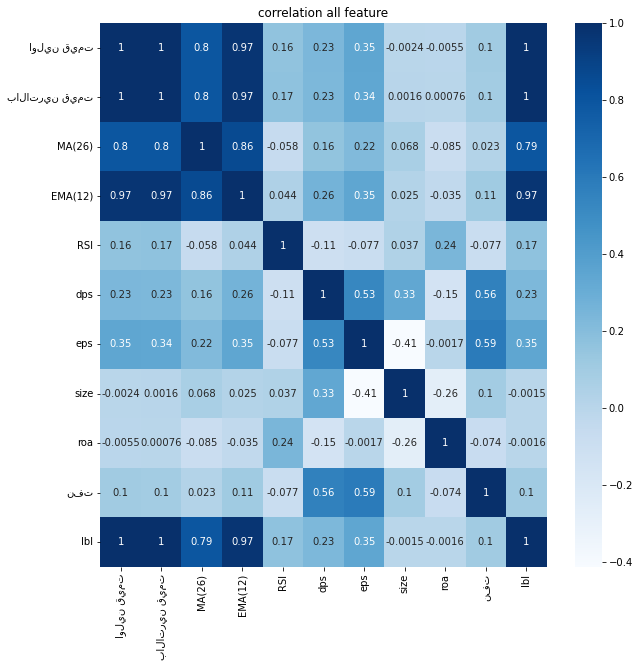

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = data_ready.iloc[:,[0,1,9,10,13,14,15,18,17,22,-1]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.title("correlation all feature")
plt.show()

In [14]:
import numpy as np
col_names=data_ready.columns
cor_abs=np.abs(cor.iloc[:,-1])
idx_sort=np.argsort(cor_abs)
sort_cor=np.round(cor_abs[idx_sort],4)
col_names_new=np.array(col_names)
col_names_sort=col_names_new[idx_sort]
for i, item in  enumerate(col_names_sort):
  print('number: {0} , colums: {1} cor: {2}'.format(i,item,sort_cor[i]))


number: 0 , colums: MA(5) cor: 0.0015
number: 1 , colums: MA(12) cor: 0.0016
number: 2 , colums: MA(26) cor: 0.1031
number: 3 , colums: حجم معاملات cor: 0.1712
number: 4 , colums: قيمت پيش گشايش cor: 0.233
number: 5 , colums: آخرين قيمت cor: 0.3464
number: 6 , colums: كمترين قيمت cor: 0.7938
number: 7 , colums: ارزش معاملات cor: 0.9699
number: 8 , colums: اولين قيمت cor: 0.9983
number: 9 , colums: بالاترين قيمت cor: 0.9991
number: 10 , colums: EMA(12) cor: 1.0


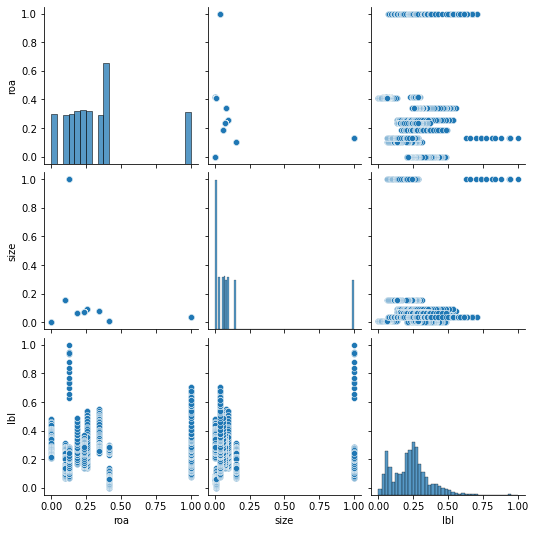

In [15]:
# importing packages
import seaborn
# pairplot with 
seaborn.pairplot(data_ready[['roa','size','lbl']])
# to show
plt.show()

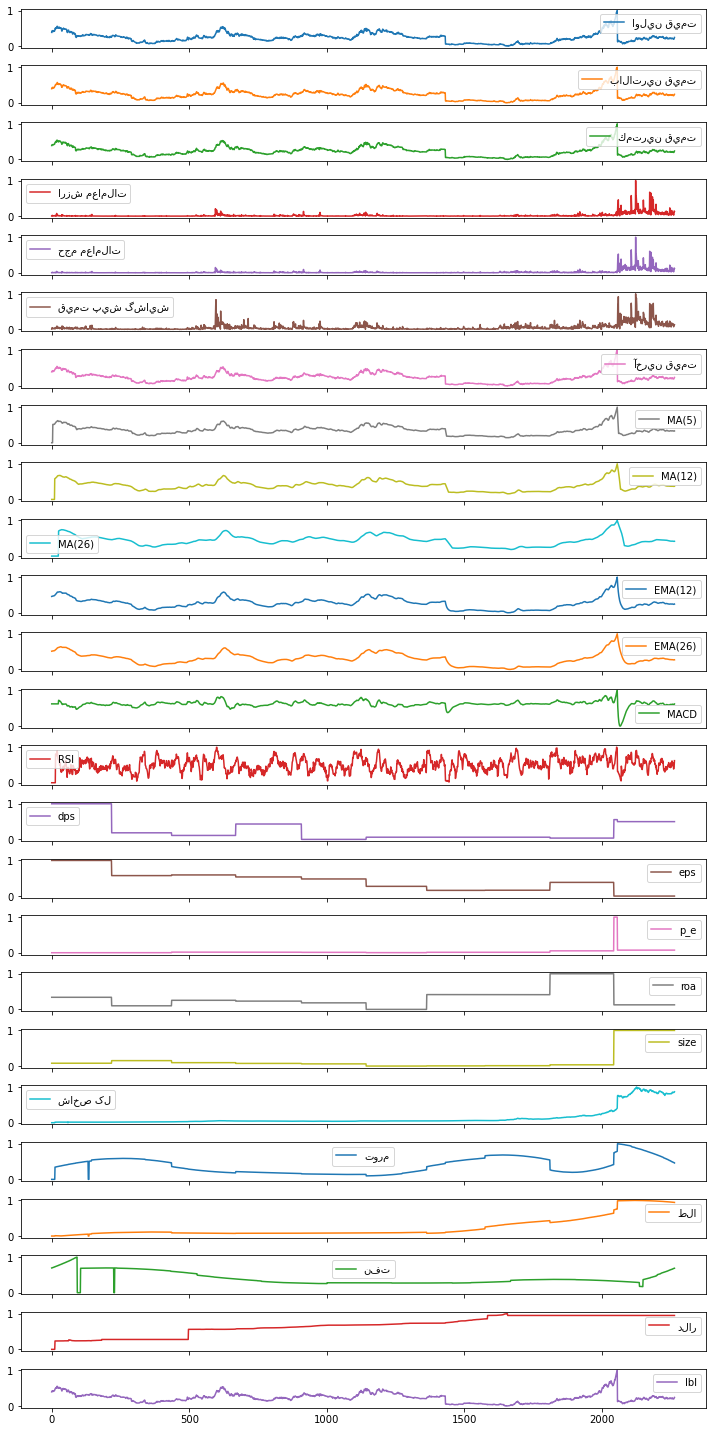

In [16]:
data_ready.plot(subplots=True,figsize=(10,20));
plt.tight_layout(); # <- this is often necessary when using subplots to avoid 

<Figure size 432x288 with 0 Axes>

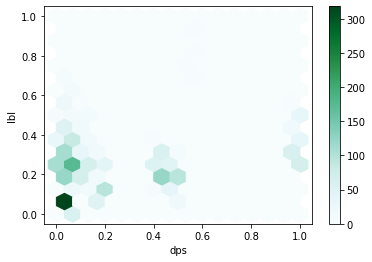

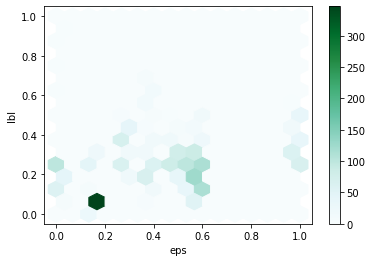

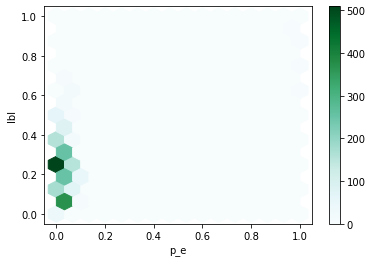

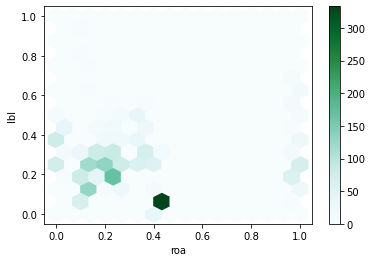

In [17]:
plt.figure()
data_ready.plot(kind="hexbin", x=data_ready.columns[14], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[15], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[16], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[17], y=data_ready.columns[-1], gridsize=15, sharex=False);
plt.show()

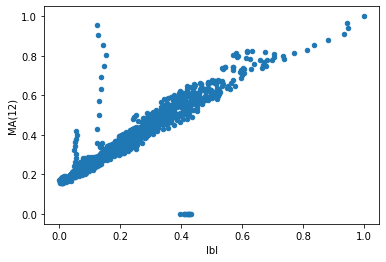

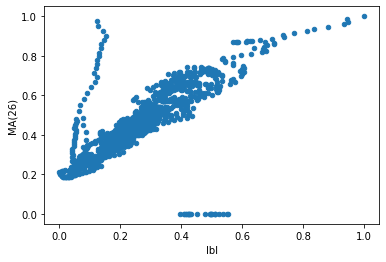

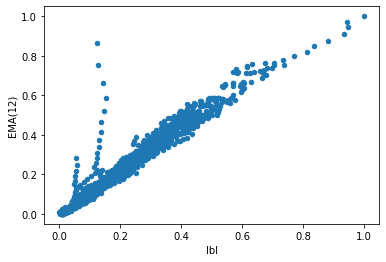

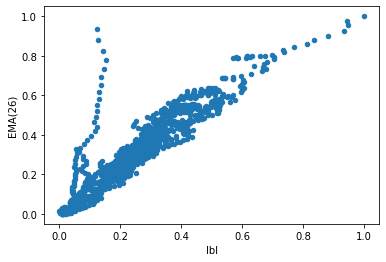

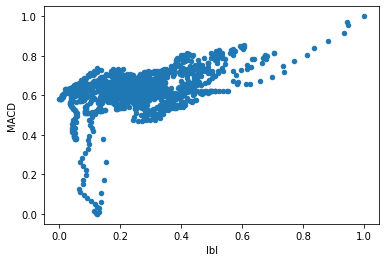

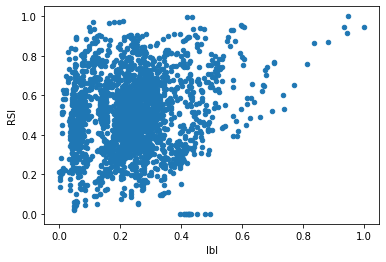

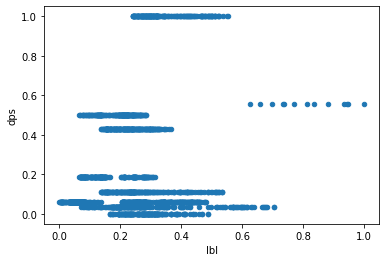

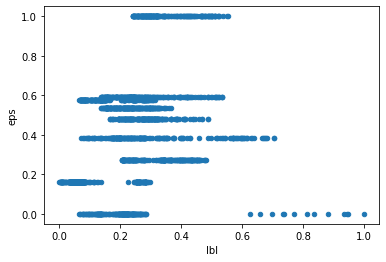

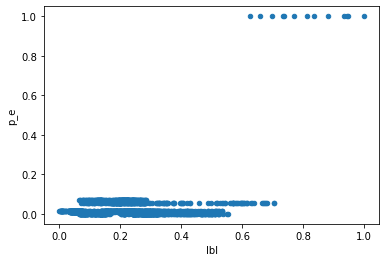

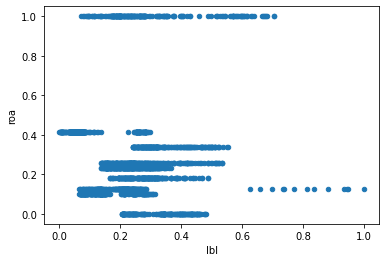

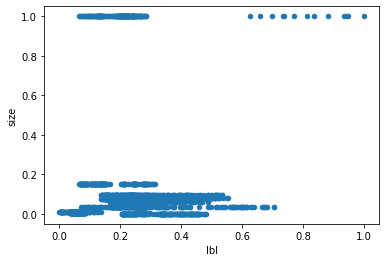

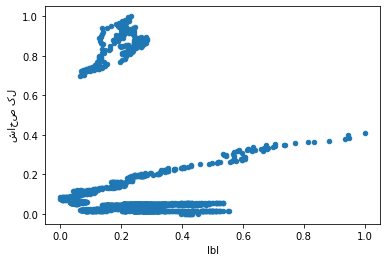

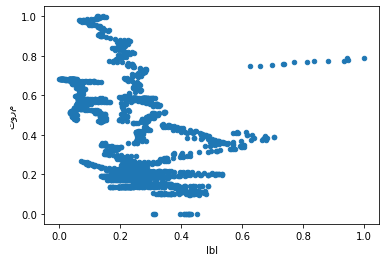

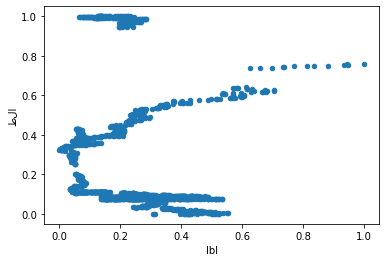

In [18]:
for i in range(8,22):
  data_ready.plot(data_ready.columns[-1], data_ready.columns[i], kind="scatter")

# **5. time window**

In [19]:
data_ready.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'MA(5)', 'MA(12)',
       'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e',
       'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

In [20]:
n_batch=32
feature_input_FastRNN=data_ready.columns.tolist()
feature_out_FastRNN=['lbl']
n_sequence=7

In [21]:
import numpy as np

def multivariate_win(dataset, target, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []
    start_index=0
    end_index = None
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)




In [22]:
STEP =1
n_step=1
past_history = n_sequence
index_precentage = -1

data_can,lbl_candel=multivariate_win(data_ready[feature_input_FastRNN].values,
                                            data_ready[feature_out_FastRNN].values,
                                            past_history,
                                            n_step, STEP,
                                            single_step=True)
print("_"*50)
print('-> data_can  shape = {0}'.format(data_can.shape))
print('-> lbl shape = {0}'.format(lbl_candel.shape))
print("_"*50)


__________________________________________________
-> data_can  shape = (2256, 7, 25)
-> lbl shape = (2256, 1)
__________________________________________________


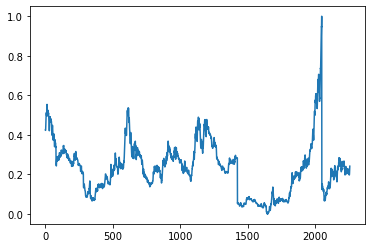

In [23]:
plt.plot(lbl_candel)
plt.show()

# **6. Train test split**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_can , lbl_candel, test_size=0.10,shuffle=False, random_state=42)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_test.shape, "\n", y_test.shape)

 (2030, 7, 25) 
 (2030, 1) 
 (226, 7, 25) 
 (226, 1)


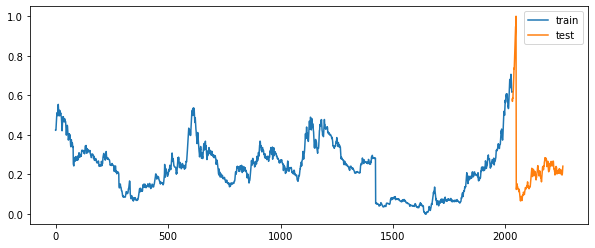

In [25]:
plt.figure(figsize=(10,4))
plt.plot(range(len(y_train)),y_train)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test)
plt.legend(['train','test'])
plt.show()

In [26]:
def fun_pre(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


def plot_pie(values,hlabels,uexplode=[0,0.1],my_color=["red","blue"]):
    plt.pie(values, 
            labels =hlabels,
            explode=uexplode,
            colors=my_color,
            autopct = lambda pct: fun_pre(pct, values))
    plt.legend()
    plt.show() 

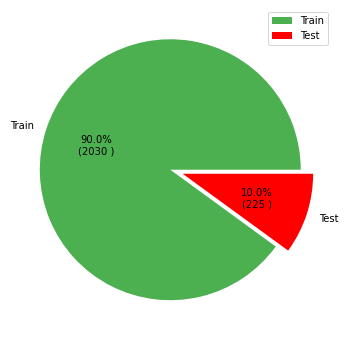

In [27]:
import matplotlib.pyplot as plt
import numpy as np
hlabels=["Train","Test"]
mycolors = [ "#4CAF50","red","blue","#0CFFF0"]

class1=X_train.shape[0]
class2=X_test.shape[0]


values=[class1,class2]
plt.figure(figsize=(6,6))
plt.title("",fontsize=14)
plot_pie(values,hlabels,[0,0.1],mycolors)
plt.show()

# **7.Horse herd optimization algorithm**

In [28]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


## 6.1 base code 

In [29]:
class Particle():
  def __init__(self):
          self.Position=[]
          self.Cost=[]
          self.Velocity=[]
          self.Best=[]

In [30]:
def HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt):

  w=1;
  phiD=0.02;
  phiI=0.02;


  g_Alpha=1.50;       #Grazing
  d_Alpha=0.5;        #Defense Mechanism
  h_Alpha=1.5;        #Hierarchy

  g_Beta=1.50;       # Grazing
  h_Beta=0.9;        #Hierarchy 
  s_Beta=0.20;       #Sociability
  d_Beta=0.20;       #Defense Mechanism

  g_Gamma=1.50;      #Grazing 
  h_Gamma=0.50;      #Hierarchy 
  s_Gamma=0.10;      #Sociability 
  i_Gamma=0.30;      #Imitation
  d_Gamma=0.10;      #Defense Mechanism 
  r_Gamma=0.05;      #Random (Wandering and Curiosity)

  g_Delta=1.50;      #Grazing
  r_Delta=0.10;      #Random (Wandering and Curiosity) 

  # Velocity limits
  VelMax = 0.3 * (VarMax - VarMin)
  VelMin = -VelMax



  Hourse = [Particle() for _ in range(nHourse)]
  GlobalBest=Particle()
  GlobalBest.Cost=np.inf;
  CostPositionCounter=np.zeros((nHourse,2+nVar));


  for i in range(nHourse):
      #Initialize Position
      Hourse[i].Position=np.random.uniform(VarMin, VarMax,VarSize)[0]
      #Initialize Velocity
      Hourse[i].Velocity=np.zeros(VarSize)

      #Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);
      #Update Personal Best
      Hourse[i].Best=deepcopy(Hourse[i])

      #Update Global Best
      if Hourse[i].Best.Cost<GlobalBest.Cost:
          GlobalBest=Hourse[i].Best;  
      ans=[i, Hourse[i].Best.Cost]
      ans.extend(Hourse[i].Best.Position.tolist())
      CostPositionCounter[i,:]=ans;

  BestCost = np.zeros((MaxIt, 1))

  #%%  Main Loop
  for it in range(MaxIt):
    CostPositionCounter=CostPositionCounter[CostPositionCounter[:, 1].argsort()]
    MeanPosition=np.mean(CostPositionCounter[0:nHourse,2:],axis=0);
    BadPosition=np.mean(CostPositionCounter[int((1-phiD)*nHourse):nHourse,2:],axis=0);
    GoodPosition=np.mean(CostPositionCounter[1:int(phiI*nHourse),2:],axis=0);
    for i in range(nHourse):
      CC=np.argwhere(CostPositionCounter[:,0]==i)[0][0]
      # Update Velocity
      if CC<=0.1*nHourse:
        Hourse[i].Velocity = h_Alpha*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        -d_Alpha*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Alpha*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
                
      elif CC<=0.3*nHourse:
        Hourse[i].Velocity = s_Beta*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
            -d_Beta*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
            +h_Beta*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
            +g_Beta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
          
      elif CC<=0.6*nHourse:
        Hourse[i].Velocity = s_Gamma*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
        +r_Gamma*rand(VarSize[1])*(Hourse[i].Position)\
        -d_Gamma*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
        +h_Gamma*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        +i_Gamma*rand(VarSize[1])*(GoodPosition-Hourse[i].Position)\
        +g_Gamma*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);
          
          
      else:
        Hourse[i].Velocity = +r_Delta*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Delta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);

      # Apply Velocity Limits
      Hourse[i].Velocity = np.maximum(Hourse[i].Velocity,VelMin);
      Hourse[i].Velocity = np.minimum(Hourse[i].Velocity,VelMax); 

      # Update Position
      Hourse[i].Position = Hourse[i].Position + Hourse[i].Velocity;
      
      # Velocity Mirror Effect
      IsOutside=(np.less(Hourse[i].Position, VarMin)\
                  | np.greater(Hourse[i].Position, VarMax))
      # IsOutside=IsOutside.reshape(1,-1)    
      Hourse[i].Velocity[IsOutside]=-Hourse[i].Velocity[IsOutside];
      
      # Apply Position Limits
      Hourse[i].Position = np.maximum(Hourse[i].Position,VarMin);
      Hourse[i].Position = np.minimum(Hourse[i].Position,VarMax);

      # Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);  

      # Update Personal Best
      if Hourse[i].Cost<Hourse[i].Best.Cost:
          Hourse[i].Best.Position=Hourse[i].Position;
          Hourse[i].Best.Cost=Hourse[i].Cost;
          # Update Global Best
          if Hourse[i].Best.Cost<GlobalBest.Cost:     
              GlobalBest=deepcopy(Hourse[i].Best);
    BestCost[it] = GlobalBest.Cost
    
    print(' , Iteration = '+ str(it)+\
              ', Best Cost = '+str(np.round(BestCost[it][0],4)))
    
    d_Alpha=d_Alpha*w; g_Alpha=g_Alpha*w;
    d_Beta=d_Beta*w; s_Beta=s_Beta*w; g_Beta=g_Beta*w;
    d_Gamma=d_Gamma*w; s_Gamma=s_Gamma*w
    r_Gamma=r_Gamma*w; i_Gamma=i_Gamma*w;
    g_Gamma=g_Gamma*w;
    r_Delta=r_Delta*w; g_Delta=g_Delta*w;
  return GlobalBest
    



## 6.2 Test 

In [31]:
from copy import copy, deepcopy
from numpy.random import rand
nHourse=10
nVar=10
VarMin = np.ones(nVar)*-100 # Lower bound of variables
VarMax = np.ones(nVar)*100 # Upper bound of variables
VarSize = (1, nVar) 
CostFunction=shpere;
MaxIt=10
best_sol=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


 , Iteration = 0, Best Cost = 4767.4248
 , Iteration = 1, Best Cost = 1851.3064
 , Iteration = 2, Best Cost = 930.7672
 , Iteration = 3, Best Cost = 402.9792
 , Iteration = 4, Best Cost = 177.1068
 , Iteration = 5, Best Cost = 28.8609
 , Iteration = 6, Best Cost = 14.153
 , Iteration = 7, Best Cost = 4.3358
 , Iteration = 8, Best Cost = 1.1717
 , Iteration = 9, Best Cost = 0.242


C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [32]:
best_sol.Position

array([ 0.08416858, -0.00759449, -0.42362282,  0.16290194, -0.00562847,
        0.00213076,  0.05264566,  0.06159685,  0.08302674,  0.12391556])

# **8.Spotted Hyena Optimizer**

In [33]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


In [34]:
def noh(best_hyena_fitness):
  min = 0.5;
  max = 1;
  count=0;
  M=(max-min)*rand() + min;
  M=M+best_hyena_fitness[0];

  for i in range(1,len(best_hyena_fitness)):
      if M>=best_hyena_fitness[i]:
        count=count+1;
  X=count;
  del count
  del M
  count=0;
  return X
  

## 7.1 base code 

In [35]:
import math
from numpy.random import rand

def SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations):

  # Initialize the hyena_pos of search agents
  hyena_pos = np.zeros((N, dimension))
  for i in range(N):
      #Initialize Position
      hyena_pos[i]=np.random.uniform(lowerbound, upperbound,dimension)

      
  Convergence_curve = np.zeros(Max_iterations)
  hyena_fitness=np.ones(N)*math.inf 


  #%%  Main Loop
  for Iteration in range(1,Max_iterations+1):
    for i in range(N):
      # Check boundries
      # FU=hyena_pos[i]>upperbound;
      # FL=hyena_pos[i]<lowerbound;
      # hyena_pos[i]=(hyena_pos[i]*(np.logical_not(FU+FL)))+FU*upperbound+FL*lowerbound
      # Apply  Limits
      hyena_pos[i] = np.maximum(hyena_pos[i],lowerbound);
      hyena_pos[i]= np.minimum(hyena_pos[i],upperbound); 

      hyena_fitness[i]=fitness(hyena_pos[i]);  


    if Iteration==1:
      idx_sort=np.argsort(hyena_fitness)
      fitness_sorted=hyena_fitness[idx_sort]
      sorted_population=hyena_pos[idx_sort].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()
    else:
      double_population=np.concatenate((pre_population,best_hyenas),axis=0);
      double_fitness=np.concatenate((pre_fitness,best_hyena_fitness),axis=0);
      idx_sort=np.argsort(double_fitness)
      double_fitness_sorted=double_fitness[idx_sort].copy()
      double_sorted_population=double_population[idx_sort].copy()
      fitness_sorted=double_fitness_sorted[0:N].copy()
      sorted_population=double_sorted_population[0:N].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()

    NOH=1+noh(best_hyena_fitness);
    Best_hyena_score=fitness_sorted[0].copy();
    Best_hyena_pos=sorted_population[0].copy();
    pre_population=hyena_pos.copy();
    pre_fitness=hyena_fitness.copy();
    
    a=5-Iteration*((5)/Max_iterations);
    HYE=0;
    CV=0;
    for i in range(N):
      for j in range(dimension):
        for k in range(NOH):
          HYE=0;
          r1=rand();
          r2=rand(); 
          Var1=2*a*r1-a; 
          Var2=2*r2; 
          distance_to_hyena=np.abs(Var2*sorted_population[k,j]-hyena_pos[i,j]);
          HYE=sorted_population[k,j]-Var1*distance_to_hyena;
          CV=CV+HYE;        
          distance_to_hyena=0;
        CV=np.array(CV)     
        hyena_pos[i,j]=(CV/(NOH+1));
        CV=0;
      
    Convergence_curve[Iteration-1]=Best_hyena_score;
    print(' , Iteration = '+ str(Iteration)+\
              ', Best Cost = '+str(np.round(Convergence_curve[Iteration-1],4)))
  return Best_hyena_pos,Best_hyena_score

## 7.2 Test 

In [36]:
from copy import copy, deepcopy
from numpy.random import rand
N=10
Max_iterations=10
dimension=10
lowerbound=np.ones(dimension)*-100 # Lower bound of variables
upperbound=np.ones(dimension)*100 # Lower bound of variables
fitness=shpere

best_Position,best_cost=SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations)


 , Iteration = 1, Best Cost = 26922.978
 , Iteration = 2, Best Cost = 26922.978
 , Iteration = 3, Best Cost = 22543.84
 , Iteration = 4, Best Cost = 21174.6117
 , Iteration = 5, Best Cost = 13032.5301
 , Iteration = 6, Best Cost = 4042.2325
 , Iteration = 7, Best Cost = 4042.2325
 , Iteration = 8, Best Cost = 1331.3144
 , Iteration = 9, Best Cost = 484.5735
 , Iteration = 10, Best Cost = 286.491


# **9.FastRNN**

## 9.1 Main code 

In [37]:
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import gen_math_ops
from tensorflow.keras import backend as K
from keras import backend
import tensorflow as tf


def gen_non_linearity(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return math_ops.tanh(A)
    elif non_linearity == "sigmoid":
        return math_ops.sigmoid(A)
    elif non_linearity == "relu":
        return gen_math_ops.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

def gen_non_linearity_keras(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return K.tanh(A)
    elif non_linearity == "sigmoid":
        return K.sigmoid(A)
    elif non_linearity == "relu":
        return K.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return K.maximum(K.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

In [38]:
from keras.layers import RNN
from keras import backend
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.initializers import RandomNormal, Constant, Ones


class FastRNNCell(keras.layers.Layer):

    def __init__(self, units, update_non_linearity="tanh",
                 wRank=None, uRank=None, alphaInit=-3.0, betaInit=3.0,
                 name="FastRNN", reuse=None,
                 **kwargs):
        self._hidden_size = units
        self.state_size = units
        self._update_non_linearity =update_non_linearity
        self._num_weight_matrices = [1, 1]
        self._wRank = wRank
        self._uRank = uRank
        self._alphaInit = alphaInit
        self._betaInit =betaInit
        if self._wRank is not None:
            self._num_weight_matrices[0] += 1
        if self._uRank is not None:
            self._num_weight_matrices[1] += 1
        self._name =name
        self.units = units
        self.state_size = units
        self.U=None
        super(FastRNNCell, self).__init__(**kwargs)
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        if self._wRank is None:
            W_matrix_init = RandomNormal(0,0.1)
            self.W = self.add_weight(
                shape=(input_dim, self._hidden_size),
                name='W',
                initializer=W_matrix_init)
        else:
            W_matrix_1_init = RandomNormal(0,0.1)
            self.W1 = self.add_weight(
                shape=(input_dim, self._wRank),
                name='W1',
                initializer=W_matrix_1_init)
            W_matrix_2_init = RandomNormal(0,0.1)
            self.W2 = self.add_weight(
                shape=(self._wRank, self._hidden_size),
                name='W2',
                initializer=W_matrix_2_init)

        if self._uRank is None:
            U_matrix_init = RandomNormal(0,0.1)
            self.U = self.add_weight(
                shape=(self._hidden_size, self._hidden_size),
                name='U',
                initializer=U_matrix_init)
        else:
            U_matrix_1_init = RandomNormal(0,0.1)
            self.U1 = self.add_weight(
                shape=(self._hidden_size, self._uRan),
                name='U1',
                initializer=U_matrix_1_init)
            U_matrix_2_init = RandomNormal(0,0.1)
            self.U2 = self.add_weight(
                shape=(self._uRank, self._hidden_size),
                name='U2',
                initializer=U_matrix_2_init)

        alpha_init = Constant(self._alphaInit)
        self.alpha = self.add_weight(
            shape=(1,1),
            name='alpha',
            initializer=alpha_init)

        beta_init = Constant(self._betaInit)
        self.beta = self.add_weight(
            shape=(1,1),
            name='beta',
            initializer=beta_init) 
        bias_update_init = Ones()
        self.bias_update = self.add_weight(
            shape=(1, self._hidden_size),
            name='B_h',
            initializer=bias_update_init)
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        if self._wRank is None:
            wComp = K.dot(inputs, self.W)
        else:
            wComp = K.dot(
                K.dot(inputs, self.W1), self.W2)

        if self._uRank is None:
            uComp = K.dot(states[0], self.U)
        else:
            uComp = K.dot(
                K.dot(states[0], self.U1), self.U2)

        pre_comp = wComp + uComp

        c = gen_non_linearity_keras(
            pre_comp + self.bias_update, self._update_non_linearity)

        new_h = K.sigmoid(self.beta) * \
            states[0] + K.sigmoid(self.alpha) * c
        return new_h, [new_h]



## 9.2  Default FastRNN

In [39]:
# from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow import keras
def create_FastRNN_Base(data):
  fatrnn1=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_1")
  fatrnn2=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_2")
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  x=keras.layers.RNN(fatrnn1, return_sequences=True, name='fast_cell_1')(input_layer)
  x=keras.layers.RNN(fatrnn2, return_sequences=True, name='fast_cell_2')(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(50, activation='relu')(x)
  x = keras.layers.Dropout(0.1)(x)
  out= keras.layers.Dense(1)(x)
  model_base_FastRNN = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model_base_FastRNN.compile(optimizer=optimizerr,loss="mse")
  return model_base_FastRNN
model_base_FastRNN=create_FastRNN_Base(X_train)
model_base_FastRNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                             

## 9.3 Fianl FastRNN

In [40]:
def get_new_fast_layer(uint,active,alpha,beta,name):
  return FastRNNCell(units=uint, 
                      update_non_linearity=active, 
                      alphaInit=alpha, 
                      betaInit=beta,
                  name=name)

In [41]:
from tensorflow import keras
def ceate_fast_rnn(data,dict_fast):
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  fastRNN1=get_new_fast_layer(dict_fast['units1'],
                     dict_fast['active1'],
                     dict_fast['alpha1'],
                     dict_fast['beta1'],'fastRNN_1')
  fastRNN2=get_new_fast_layer(dict_fast['units2'],
                     dict_fast['active2'],
                     dict_fast['alpha2'],
                     dict_fast['beta2'],'fastRNN_2')
  fastRNN3=get_new_fast_layer(dict_fast['units3'],
                     dict_fast['active3'],
                     dict_fast['alpha3'],
                     dict_fast['beta3'],'fastRNN_3')
  
  
  x=keras.layers.RNN(fastRNN1, return_sequences=True,name='fastRNN_1')(input_layer)
  if(dict_fast['use_layer2'] ):
    x=keras.layers.RNN(fastRNN2, return_sequences=True,name='fastRNN_2')(x)
  if(dict_fast['use_layer3'] ):
    x=keras.layers.RNN(fastRNN3, return_sequences=True,name='fastRNN_3')(x)

  if(dict_fast['use_batchnorm'] ):
    x=keras.layers.BatchNormalization()(x)
  # x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(dict_fast['dense1'], activation='relu')(x)
  x = keras.layers.Dense(dict_fast['dense2'], activation='relu')(x)
  x = keras.layers.Dropout(dict_fast['drop'])(x)
  out= keras.layers.Dense(1)(x)
  model = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model.compile(optimizer=optimizerr,loss="mse")
  return model





In [42]:
dict_fast=dict()
dict_fast['use_layer2']  =True
dict_fast['use_layer3']  =True
dict_fast['use_batchnorm']   =True
dict_fast['units1']  =32
dict_fast['active1'] ='relu'
dict_fast['alpha1']  =-1.0
dict_fast['beta1']   =1.0
dict_fast['units2']  =32
dict_fast['active2'] ='relu'
dict_fast['alpha2']  =-3.0
dict_fast['beta2']   =3.0
dict_fast['units3']  =32
dict_fast['active3'] ='relu'
dict_fast['alpha3']  =-3.0
dict_fast['beta3']   =3.0
dict_fast['dense1']   =200
dict_fast['dense2']   =200
dict_fast['drop']   =0.1
model=ceate_fast_rnn(X_train,dict_fast)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 32)             3682      
                                                                 
 fastRNN_2 (RNN)             (None, 7, 32)             4130      
                                                                 
 fastRNN_3 (RNN)             (None, 7, 32)             4130      
                                                                 
 batch_normalization (BatchN  (None, 7, 32)            128       
 ormalization)                                                   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                          

# **10. Optimal FastRNN**

## 10.1 train and validation

In [43]:
from sklearn.model_selection import train_test_split

XX_train, XX_vali, yy_train, yy_vali = train_test_split(X_train , y_train, test_size=0.20,shuffle=False, random_state=42)
print("", XX_train.shape, "\n", yy_train.shape, 
      "\n", XX_vali.shape, "\n", yy_vali.shape)

 (1624, 7, 25) 
 (1624, 1) 
 (406, 7, 25) 
 (406, 1)


In [44]:
# XX_train, XX_vali, yy_train, yy_vali =X_train ,X_test, y_train,y_test
# print("", XX_train.shape, "\n", yy_train.shape, 
#       "\n", XX_vali.shape, "\n", yy_vali.shape)

## 10.2 Define parameter optimal

In [45]:
array_active=['tanh', 'sigmoid', 'relu', 'quantTanh']
array_units_rnn=[ 2**item for item in range(2,11)]
array_drop=[ item/100 for item in range(0,100,3)]
array_units_dense=[ 2**item for item in range(0,12)]
array_use=[False,True]
array_units_dense

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [46]:
lb=np.zeros(18)
ub=np.zeros(18)
lb[0]=0;ub[0]=1;   # 0 : use_layer2: True, False : 0-1
lb[1]=0;ub[1]=1;   # 1 : use_layer3: True, False : 0-1
lb[2]=0;ub[2]=1;   # 2 : use_batchnorm: True, False : 0-1

lb[3]=0;ub[3]=8;   # 3 : units1: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[4]=0;ub[4]=3;   # 4 : active1: ['relu','sigmoid','elu','tanh'] : 0-4
lb[5]=-10;ub[5]=0; # 5 : alpha1: [-10....0] : (-10,0)
lb[6]=0;ub[6]=10;  # 6 : beta1: [0....10] : (0,10)

lb[7]=0;ub[7]=8;   # 7 : units2: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[8]=0;ub[8]=3;   # 8 : active2: ['relu','sigmoid','elu','tanh'] : 0-4
lb[9]=-10;ub[9]=0; # 9 : alpha2: [-10....0] : (-10,0)
lb[10]=0;ub[10]=10;# 10 : beta2: [0....10] : (0,10)

lb[11]=0;ub[11]=9;   # 11 : units3: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[12]=0;ub[12]=3;   # 12 : active3: ['relu','sigmoid','elu','tanh'] : 0-4
lb[13]=-10;ub[13]=0; # 13 : alpha3: [-10....0] : (-10,0)
lb[14]=0;ub[14]=10;  # 14 : beta3: [0....10] : (0,10)

lb[15]=0;ub[15]=11;  # 15 : dense1: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[16]=0;ub[16]=11;  # 16 : dense2: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[17]=0;ub[17]=33;  # 17 : drop: [0.0, 0.03, 0.06, 0.09,.....0.93, 0.96, 0.99] : 0-34


## 10.3 fitness

In [47]:
def int_round(x):
  return np.int32(np.round(x))

In [48]:
def fitness(x):

  try:
    dict_fast=dict()
    dict_fast['use_layer2']      =array_use[int_round(x[0])]
    dict_fast['use_layer3']      =array_use[int_round(x[1])]
    dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
    dict_fast['units1']          =array_units_rnn[int_round(x[3])]
    dict_fast['active1']         =array_active[int_round(x[4])]
    dict_fast['alpha1']    =np.round(x[5],4)
    dict_fast['beta1']     =np.round(x[6],4)
    dict_fast['units2']    =array_units_rnn[int_round(x[7])]
    dict_fast['active2']   =array_active[int_round(x[8])]
    dict_fast['alpha2']    =np.round(x[9],4)
    dict_fast['beta2']     =np.round(x[10],4)
    dict_fast['units3']    =array_units_rnn[int_round(x[11])]
    dict_fast['active3']   =array_active[int_round(x[12])]
    dict_fast['alpha3']    =np.round(x[13],4)
    dict_fast['beta3']     =np.round(x[14],4)
    dict_fast['dense1']    =array_units_dense[int_round(x[15])]
    dict_fast['dense2']    =array_units_dense[int_round(x[16])]
    dict_fast['drop']      =array_drop[int_round(x[17])]
  except:
    return np.inf

  model=ceate_fast_rnn(XX_train,dict_fast)
  # model.summary()
  hist_model=model.fit(x=XX_train, y=yy_train,
                       validation_data=(XX_vali,yy_vali),
                       epochs=epochs_opti,shuffle=True,
                       batch_size=batch_size_opti,verbose=0)
  print("_"*100)
  print(x)

  for key, value in dict_fast.items():
      # print(".."*20)
      print(key,':',value)
  a=np.mean(hist_model.history['val_loss'][-10:])
  b=np.mean(hist_model.history['loss'][-10:])
  c=np.max(hist_model.history['loss'][-10:])
  
  val_loss_mean=60*a+40*b+100*c
  print(".."*10)
  print(val_loss_mean)
  print("_"*100)
  return val_loss_mean


In [49]:
import numpy as np
x=np.random.uniform(lb,ub,(len(lb)))

In [50]:

epochs_opti=100
batch_size_opti=256

fitness(x)

____________________________________________________________________________________________________
[ 0.01892242  0.37558408  0.90999561  4.85836828  2.05294645 -8.59993974
  2.7644734   2.317825    1.04811839 -7.28668153  6.08504422  7.33913049
  1.68796474 -8.05731399  2.25156093  2.70392273  5.67267171 17.44952699]
use_layer2 : False
use_layer3 : False
use_batchnorm : True
units1 : 128
active1 : relu
alpha1 : -8.5999
beta1 : 2.7645
units2 : 16
active2 : sigmoid
alpha2 : -7.2867
beta2 : 6.085
units3 : 512
active3 : relu
alpha3 : -8.0573
beta3 : 2.2516
dense1 : 8
dense2 : 64
drop : 0.51
....................
0.9995159767568111
____________________________________________________________________________________________________


0.9995159767568111

## 10.4 hybrid FastRNN+HOA

In [43]:
from copy import copy, deepcopy
from numpy.random import rand
epochs_opti=100
batch_size_opti=128

nHourse=7
nVar=len(lb)
VarMin =lb
VarMax = ub
VarSize = (1, nVar) 
CostFunction=fitness;
MaxIt=100
best_sol_HOA=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


____________________________________________________________________________________________________
[ 0.91407994  0.68042005  0.85228114  7.67070394  1.16043784 -2.14260985
  6.12761694  0.73624657  2.78960245 -5.31231513  7.52661106  5.75843419
  2.42019293 -8.60918689  0.99805337  0.49389148  7.98309175 18.7887645 ]
use_layer2 : True
use_layer3 : True
use_batchnorm : True
units1 : 1024
active1 : sigmoid
alpha1 : -2.1426
beta1 : 6.1276
units2 : 8
active2 : quantTanh
alpha2 : -5.3123
beta2 : 7.5266
units3 : 256
active3 : relu
alpha3 : -8.6092
beta3 : 0.9981
dense1 : 1
dense2 : 256
drop : 0.57
....................
3.6959379203617573
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 2.75439790e-01  4.05171992e-03  1.96067725e-01  2.23396439e+00
  2.86119595e+00 -1.25381626e-01  7.08987526e+00  5.26121403e+00
  2.20528452e+00 -3.6760198

____________________________________________________________________________________________________
[ 0.80171817  0.55381886  0.4891291   6.61121098  0.90435978 -8.02884802
  3.55496048  3.78480087  2.33323849 -1.55724617  6.1976541   5.62123112
  2.21978102 -5.56138037  5.08073358  7.75195781  2.27833163  1.57291114]
use_layer2 : True
use_layer3 : True
use_batchnorm : False
units1 : 512
active1 : sigmoid
alpha1 : -8.0288
beta1 : 3.555
units2 : 64
active2 : relu
alpha2 : -1.5572
beta2 : 6.1977
units3 : 256
active3 : relu
alpha3 : -5.5614
beta3 : 5.0807
dense1 : 256
dense2 : 4
drop : 0.06
....................
3.7037067860364914
____________________________________________________________________________________________________
 , Iteration = 0, Best Cost = 0.6594
____________________________________________________________________________________________________
[ 2.88820903e-01  4.40925577e-03  1.88914590e-01  2.23117046e+00
  3.00000000e+00 -1.26288955e-01  7.08414114e+00  5.00895214

____________________________________________________________________________________________________
[ 3.17958663e-01  4.37657547e-03  2.25994051e-01  2.54567294e+00
  3.00000000e+00 -1.39768556e-01  7.66044011e+00  5.67658661e+00
  2.36936669e+00 -3.87802605e+00  2.27066934e+00  7.02653905e+00
  2.24280458e+00 -4.13216955e-01  2.17083605e+00  1.10000000e+01
  2.62366585e+00  2.73508419e+01]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 32
active1 : quantTanh
alpha1 : -0.1398
beta1 : 7.6604
units2 : 256
active2 : relu
alpha2 : -3.878
beta2 : 2.2707
units3 : 512
active3 : relu
alpha3 : -0.4132
beta3 : 2.1708
dense1 : 2048
dense2 : 8
drop : 0.81
....................
3.6959278769791126
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.73526495  0.38294314  0.13519223  2.850295    2.18934452 -1.5594694
  8.4455124

____________________________________________________________________________________________________
[ 0.73814741  0.3972901   0.24925391  4.3020999   2.68498369 -2.49102099
  8.04785466  3.43124716  2.4495379  -1.70380952  1.88095663  2.34494898
  2.18930046 -6.66270115  3.35729371  5.72323812  6.4114236  19.90392972]
use_layer2 : True
use_layer3 : False
use_batchnorm : False
units1 : 64
active1 : quantTanh
alpha1 : -2.491
beta1 : 8.0479
units2 : 32
active2 : relu
alpha2 : -1.7038
beta2 : 1.881
units3 : 16
active3 : relu
alpha3 : -6.6627
beta3 : 3.3573
dense1 : 64
dense2 : 64
drop : 0.6
....................
0.7225474389269948
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.76653011  0.45387411  0.59721658  4.26029273  1.58295431 -3.73990328
  4.86627805  3.35177923  2.21174392 -0.27883112  3.20460517  3.86404116
  1.97277873 -5.9

____________________________________________________________________________________________________
[ 3.39556543e-01  4.68393537e-03  2.48715929e-01  2.74023593e+00
  3.00000000e+00 -1.49169112e-01  7.52361955e+00  6.39018831e+00
  2.59837645e+00 -4.14696414e+00  2.46075346e+00  7.74445339e+00
  2.26118609e+00 -4.62275643e-01  2.33041056e+00  1.10000000e+01
  2.72377628e+00  3.05732311e+01]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 32
active1 : quantTanh
alpha1 : -0.1492
beta1 : 7.5236
units2 : 256
active2 : quantTanh
alpha2 : -4.147
beta2 : 2.4608
units3 : 1024
active3 : relu
alpha3 : -0.4623
beta3 : 2.3304
dense1 : 2048
dense2 : 8
drop : 0.93
....................
3.6959248483181
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.61720016  0.92121511  0.20876876  2.13541849  3.         -0.59498807
  3.121

____________________________________________________________________________________________________
[ 0.69849128  0.46238032  0.3529441   5.07185816  2.47191124 -2.71064793
  7.54062895  4.01010831  2.25623633 -1.80904763  0.3165447   2.84158299
  2.46577084 -7.34504719  1.34289685  6.09110315  6.2299224  16.87483811]
use_layer2 : True
use_layer3 : False
use_batchnorm : False
units1 : 128
active1 : relu
alpha1 : -2.7106
beta1 : 7.5406
units2 : 64
active2 : relu
alpha2 : -1.809
beta2 : 0.3165
units3 : 32
active3 : relu
alpha3 : -7.345
beta3 : 1.3429
dense1 : 64
dense2 : 64
drop : 0.51
....................
0.5485808979719877
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.53180217  0.44828293  0.31759667  6.61352233  1.54309253 -3.59184291
  6.95095542  4.00593812  1.89595132 -1.42820251  0.66227665  3.41070233
  1.41201867 -6.4377

____________________________________________________________________________________________________
[ 3.44035986e-01  5.33536136e-03  2.67206183e-01  2.76394272e+00
  3.00000000e+00 -1.58302674e-01  8.40743257e+00  6.86888232e+00
  2.85528828e+00 -4.21268666e+00  2.56679000e+00  8.31903006e+00
  2.53092206e+00 -4.60756097e-01  2.57735321e+00  1.10000000e+01
  2.86621442e+00  3.30000000e+01]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 32
active1 : quantTanh
alpha1 : -0.1583
beta1 : 8.4074
units2 : 512
active2 : quantTanh
alpha2 : -4.2127
beta2 : 2.5668
units3 : 1024
active3 : quantTanh
alpha3 : -0.4608
beta3 : 2.5774
dense1 : 2048
dense2 : 8
drop : 0.99
....................
3.6958411671221256
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.65062248  0.89925763  0.20662663  2.26439346  3.         -0.6132864

____________________________________________________________________________________________________
[ 0.53870189  0.48229056  0.23253061  6.47999657  2.19001907 -3.4284231
  7.33763076  3.98467052  1.81987684 -0.32214134  0.          4.21586382
  1.64845219 -6.0377247   2.31052249  4.42964898  7.25305164 13.37905355]
use_layer2 : True
use_layer3 : False
use_batchnorm : False
units1 : 256
active1 : relu
alpha1 : -3.4284
beta1 : 7.3376
units2 : 64
active2 : relu
alpha2 : -0.3221
beta2 : 0.0
units3 : 64
active3 : relu
alpha3 : -6.0377
beta3 : 2.3105
dense1 : 16
dense2 : 128
drop : 0.39
....................
0.5763745298609138
____________________________________________________________________________________________________
 , Iteration = 15, Best Cost = 0.3803
____________________________________________________________________________________________________
[ 0.54735989  0.55486136  0.30089287  5.70144319  2.34588653 -4.09818365
  8.11975669  5.0254171   1.64048875 -3.28736065  0.    

____________________________________________________________________________________________________
[ 0.64642548  0.94539904  0.21806479  2.17112331  3.         -0.61585807
  3.29581624  2.84177807  1.02486383 -9.51666789  0.49174152  8.10471292
  0.27939756 -3.99934757  8.97866547  9.57539953 10.29655638 33.        ]
use_layer2 : True
use_layer3 : True
use_batchnorm : False
units1 : 16
active1 : quantTanh
alpha1 : -0.6159
beta1 : 3.2958
units2 : 32
active2 : sigmoid
alpha2 : -9.5167
beta2 : 0.4917
units3 : 1024
active3 : tanh
alpha3 : -3.9993
beta3 : 8.9787
dense1 : 1024
dense2 : 1024
drop : 0.99
....................
3.697745956480503
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.17745773  0.24766668  0.16743342  3.71321002  2.81445688 -1.09609134
  6.12457183  2.70942784  1.38125571 -0.57363622  0.          0.94732809
  0.664

____________________________________________________________________________________________________
[ 0.61018225  0.96503336  0.21230853  2.25488047  3.         -0.56985471
  3.1372482   3.03857488  1.00558754 -9.12182781  0.45952412  8.37840224
  0.30858489 -4.11264463  8.96431573 10.11424595 10.10725194 33.        ]
use_layer2 : True
use_layer3 : True
use_batchnorm : False
units1 : 16
active1 : quantTanh
alpha1 : -0.5699
beta1 : 3.1372
units2 : 32
active2 : sigmoid
alpha2 : -9.1218
beta2 : 0.4595
units3 : 1024
active3 : tanh
alpha3 : -4.1126
beta3 : 8.9643
dense1 : 1024
dense2 : 1024
drop : 0.99
....................
3.6969160176813602
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.21104706  0.4339397   0.29252598  3.31945873  2.05357095 -0.68680757
  4.65417194  2.45311859  0.41670257 -0.32584871  0.          1.87031431
  1.05

____________________________________________________________________________________________________
[ 0.67241799  0.99333024  0.22253568  2.13314949  3.         -0.6002578
  3.24544104  3.02032796  1.05385948 -9.07657442  0.48314166  8.35720473
  0.28188298 -3.72792242  8.98828258  9.81843103 10.65497616 33.        ]
use_layer2 : True
use_layer3 : True
use_batchnorm : False
units1 : 16
active1 : quantTanh
alpha1 : -0.6003
beta1 : 3.2454
units2 : 32
active2 : sigmoid
alpha2 : -9.0766
beta2 : 0.4831
units3 : 1024
active3 : tanh
alpha3 : -3.7279
beta3 : 8.9883
dense1 : 1024
dense2 : 2048
drop : 0.99
....................
3.698320996016264
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.26035738  0.1339397   0.02046497  1.2119515   1.45693377 -0.52342174
  0.98783462  0.58206693  0.44068005  0.          0.          1.24692765
  0.5331

____________________________________________________________________________________________________
[ 0.2376467   0.35890447  0.25601162  3.44870994  1.82166452 -1.55647163
  4.01070919  2.19802383  1.61581672  0.          0.46974056  4.83394164
  1.14283502 -0.93335312  0.          2.92508797  5.13483897  6.46684719]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 32
active1 : relu
alpha1 : -1.5565
beta1 : 4.0107
units2 : 16
active2 : relu
alpha2 : 0.0
beta2 : 0.4697
units3 : 128
active3 : sigmoid
alpha3 : -0.9334
beta3 : 0.0
dense1 : 8
dense2 : 32
drop : 0.18
....................
0.8129253694787621
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.33131559  0.29827929  0.2739112   5.03898463  1.83260398 -1.84142829
  3.75468542  2.03608589  1.23524259 -1.37111319  0.62768327  2.0808826
  1.53469501 -1.4466619

____________________________________________________________________________________________________
[ 0.43753769  0.23995     0.33464309  3.68389125  2.00743737 -1.03133836
  6.69593016  1.42096554  2.12407338  0.          0.          2.57247146
  1.79191285 -3.5509537   0.          5.42501664  7.40746638  8.16785485]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 64
active1 : relu
alpha1 : -1.0313
beta1 : 6.6959
units2 : 8
active2 : relu
alpha2 : 0.0
beta2 : 0.0
units3 : 32
active3 : relu
alpha3 : -3.551
beta3 : 0.0
dense1 : 32
dense2 : 128
drop : 0.24
....................
0.4844917245209217
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.33492531  0.32835673  0.24944722  4.51389782  1.71239511 -1.0522265
  3.72180998  1.8991517   0.79994364 -1.29414963  1.13180017  1.44964014
  1.069108   -0.83249296  1.05

____________________________________________________________________________________________________
[ 0.65926692  0.95538777  0.22339835  2.11448896  3.         -0.62934213
  3.24953431  2.83195708  1.02931309 -9.43994386  0.46385031  8.16569163
  0.30061053 -4.20146316  8.78884189  9.90160397 10.52793396 33.        ]
use_layer2 : True
use_layer3 : True
use_batchnorm : False
units1 : 16
active1 : quantTanh
alpha1 : -0.6293
beta1 : 3.2495
units2 : 32
active2 : sigmoid
alpha2 : -9.4399
beta2 : 0.4639
units3 : 1024
active3 : tanh
alpha3 : -4.2015
beta3 : 8.7888
dense1 : 1024
dense2 : 2048
drop : 0.99
....................
3.6983229145407677
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[0.11770579 0.06249583 0.01036997 0.54259029 0.921254   0.
 0.47029125 0.24155642 0.28740296 0.         0.         0.39868295
 0.14646741 0.         0. 

____________________________________________________________________________________________________
[ 0.18439668  0.05720295  0.          2.45923765  0.62760804 -0.73128397
  1.51688457  0.69592564  1.36419161 -0.7417223   0.          1.17731157
  0.83858397 -0.10999989  0.          0.          3.41485183  2.05442979]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 16
active1 : sigmoid
alpha1 : -0.7313
beta1 : 1.5169
units2 : 8
active2 : sigmoid
alpha2 : -0.7417
beta2 : 0.0
units3 : 8
active3 : sigmoid
alpha3 : -0.11
beta3 : 0.0
dense1 : 1
dense2 : 8
drop : 0.06
....................
0.5459594107232988
____________________________________________________________________________________________________
 , Iteration = 38, Best Cost = 0.1068
____________________________________________________________________________________________________
[0.31063553 0.         0.00821036 0.21048354 1.34935067 0.
 0.         0.         0.2718471  0.         0.         0.
 0.        

KeyboardInterrupt: 

In [ ]:
# best result
# 0.13067323 0.06912944 0.01500095 0.77056502 1.02975468 0.
#  0.78050012 0.36090896 0.42536474 0.         0.         0.65263091
#  0.27089382 0.         0.         0.11750731 2.92822265 0.        ]
# use_layer2 : False
# use_layer3 : False
# use_batchnorm : False
# units1 : 8
# active1 : sigmoid
# alpha1 : 0.0
# beta1 : 0.7805
# units2 : 4
# active2 : tanh
# alpha2 : 0.0
# beta2 : 0.0
# units3 : 8
# active3 : tanh
# alpha3 : 0.0
# beta3 : 0.0
# dense1 : 1
# dense2 : 8
# drop : 0.0
# ....................
# 0.10680846602190286

In [44]:
sol_opti_HOA=np.array([0.13067323, 0.06912944, 0.01500095, 0.77056502 ,1.02975468 ,0.,
                       0.78050012, 0.36090896, 0.42536474, 0.    ,     0.    ,     0.65263091,
                       0.27089382, 0.     ,    0.   ,      0.11750731, 2.92822265, 0.        ])

In [ ]:
sol_opti_HOA=best_sol_HOA.Position

In [45]:
sol_opti_HOA

array([0.13067323, 0.06912944, 0.01500095, 0.77056502, 1.02975468,
       0.        , 0.78050012, 0.36090896, 0.42536474, 0.        ,
       0.        , 0.65263091, 0.27089382, 0.        , 0.        ,
       0.11750731, 2.92822265, 0.        ])

## 10.5 hybrid FastRNN+SHo

In [85]:
from copy import copy, deepcopy
from numpy.random import rand
epochs_opti=100
batch_size_opti=256

N=8
Max_iterations=30
dimension=len(lb)
lowerbound=lb
upperbound=ub
fitness=fitness

best_sol_SHO,best_cost=SHO(N,nVar,lb,upperbound,dimension,fitness,Max_iterations)

____________________________________________________________________________________________________
[ 0.95173767  0.15361317  0.76042832  7.93736424  0.18795752 -5.24321075
  0.67416468  5.57284848  0.98533279 -5.85180587  0.33642343  6.23310964
  0.86286667 -0.684685    6.58826042  8.294046   10.47747986 17.2404977 ]
use_layer2 : True
use_layer3 : False
use_batchnorm : True
units1 : 1024
active1 : tanh
alpha1 : -5.2432
beta1 : 0.6742
units2 : 256
active2 : sigmoid
alpha2 : -5.8518
beta2 : 0.3364
units3 : 256
active3 : sigmoid
alpha3 : -0.6847
beta3 : 6.5883
dense1 : 256
dense2 : 1024
drop : 0.51
....................
1.2165347030386329
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.50335641  0.12764317  0.90126516  5.6426344   1.08161049 -2.7102854
  9.75259302  7.46651668  0.12490625 -5.8407847   6.55604956  8.37935497
  0.1090

____________________________________________________________________________________________________
[ 0.33648917  0.          0.          0.93371801  3.         -6.28125696
  0.          4.06509965  0.68734344 -7.84569253  5.42515184  3.40381391
  3.         -7.46364056  0.7129658   6.34332007  3.96430803  2.11169233]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : quantTanh
alpha1 : -6.2813
beta1 : 0.0
units2 : 64
active2 : sigmoid
alpha2 : -7.8457
beta2 : 5.4252
units3 : 32
active3 : quantTanh
alpha3 : -7.4636
beta3 : 0.713
dense1 : 64
dense2 : 16
drop : 0.06
....................
1.1970937908627093
____________________________________________________________________________________________________
 , Iteration = 2, Best Cost = 0.3562
____________________________________________________________________________________________________
[ 0.34111096  0.27223069  0.48641759  8.          1.0612356   0.
  2.81322294  0.          0.24195716 -3.87032809  1.76

____________________________________________________________________________________________________
[ 0.18099758  0.0280976   0.01979104  2.30432908  2.63777395 -0.07815921
  6.26072513  5.6787306   0.45400142 -9.29814566  2.31480172  0.
  1.70500324 -3.89151294  9.13978363  8.57495342  9.99914004  0.        ]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 16
active1 : quantTanh
alpha1 : -0.0782
beta1 : 6.2607
units2 : 256
active2 : tanh
alpha2 : -9.2981
beta2 : 2.3148
units3 : 4
active3 : relu
alpha3 : -3.8915
beta3 : 9.1398
dense1 : 512
dense2 : 1024
drop : 0.0
....................
0.21537082106806338
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.4013062   0.          0.29568987  1.41548079  1.71222732  0.
  0.          2.88244648  0.85394946  0.          3.75768584  7.10954928
  3.         -8.43574485  

____________________________________________________________________________________________________
[ 0.32306153  0.10191742  0.02047767  5.58384021  3.         -7.7429467
  1.41153125  7.97529692  0.27717566  0.          0.          1.08805317
  2.62571483 -1.4456447   1.18057112  5.09486928  0.          0.        ]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 256
active1 : quantTanh
alpha1 : -7.7429
beta1 : 1.4115
units2 : 1024
active2 : tanh
alpha2 : 0.0
beta2 : 0.0
units3 : 8
active3 : quantTanh
alpha3 : -1.4456
beta3 : 1.1806
dense1 : 32
dense2 : 1
drop : 0.0
....................
3.6913335509598255
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.11349748  0.03474247  0.24502033  5.46211612  0.58601671  0.
  0.          0.54746884  0.04956282 -7.08253264  2.05266069  0.
  2.37674252 -1.33962538  0.    

____________________________________________________________________________________________________
[ 0.27405687  0.          0.          2.14642294  2.29341223 -2.48614166
  2.96345604  3.97968304  0.         -7.29235484  2.42493319  1.67741391
  2.44116233  0.          1.57795199  0.          6.89566216  5.55014437]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 16
active1 : relu
alpha1 : -2.4861
beta1 : 2.9635
units2 : 64
active2 : tanh
alpha2 : -7.2924
beta2 : 2.4249
units3 : 16
active3 : relu
alpha3 : 0.0
beta3 : 1.578
dense1 : 1
dense2 : 128
drop : 0.18
....................
3.6919810585677624
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[  0.30737992   0.23663493   0.           2.05823478   0.81161504
  -3.42987285   3.25556646   6.36930452   1.16424681 -10.
   3.32979524   1.62829612   2.28444957  -6.0

____________________________________________________________________________________________________
[ 0.3133513   0.23933406  0.          0.42176038  0.8199826  -4.84659285
  0.          5.24558163  0.77379788 -3.2184849   3.0426974   4.09857637
  2.78301868  0.          1.64603798  5.6579144   5.33495022  2.0344267 ]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 4
active1 : sigmoid
alpha1 : -4.8466
beta1 : 0.0
units2 : 128
active2 : sigmoid
alpha2 : -3.2185
beta2 : 3.0427
units3 : 64
active3 : quantTanh
alpha3 : 0.0
beta3 : 1.646
dense1 : 64
dense2 : 32
drop : 0.06
....................
1.4677648888900876
____________________________________________________________________________________________________
 , Iteration = 8, Best Cost = 0.1665
____________________________________________________________________________________________________
[ 0.11005749  0.0486852   0.14273714  1.46762027  0.99623754 -5.45546847
  0.          2.09956552  1.29905932 -9.12736038  0

____________________________________________________________________________________________________
[ 0.1310857   0.13976397  0.36261492  5.5366614   1.70238434 -0.28763676
  0.          3.33622307  0.70283409 -5.36196582  2.77551877  0.31702012
  1.41286493 -6.89910355  0.20547799 11.          0.79191188  3.7771623 ]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 256
active1 : relu
alpha1 : -0.2876
beta1 : 0.0
units2 : 32
active2 : sigmoid
alpha2 : -5.362
beta2 : 2.7755
units3 : 4
active3 : sigmoid
alpha3 : -6.8991
beta3 : 0.2055
dense1 : 2048
dense2 : 2
drop : 0.12
....................
3.6913335509598255
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.08206261  0.1090062   0.          7.22722257  1.16274686 -8.20885047
  1.68784864  6.15503231  0.38075487  0.          4.16513429  0.
  1.73551937 -9.3010272

____________________________________________________________________________________________________
[ 0.09849867  0.05795951  0.29687417  2.90223479  0.44412444 -4.10773373
  0.          0.73670403  0.43277186 -2.40378911  4.30947722  0.62022055
  2.89158089  0.          0.4218283   6.21054501  3.25565563  0.        ]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 32
active1 : tanh
alpha1 : -4.1077
beta1 : 0.0
units2 : 8
active2 : tanh
alpha2 : -2.4038
beta2 : 4.3095
units3 : 8
active3 : quantTanh
alpha3 : 0.0
beta3 : 0.4218
dense1 : 64
dense2 : 8
drop : 0.0
....................
0.45758685655891895
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.05898356  0.0207333   0.11267435  4.92017161  1.43823664 -2.18818765
  2.20738632  2.4649939   0.94822867 -4.87669826  0.          2.84042034
  3.         -0.3163543

____________________________________________________________________________________________________
[ 0.06550106  0.07108401  0.23371667  0.13774895  1.94051107 -3.74731047
  1.61400663  2.07017589  0.47052385 -3.71099468  2.20794555  2.07153455
  2.08064984 -7.87985531  0.          5.30760373  4.81946746  4.29508456]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 4
active1 : relu
alpha1 : -3.7473
beta1 : 1.614
units2 : 16
active2 : tanh
alpha2 : -3.711
beta2 : 2.2079
units3 : 16
active3 : relu
alpha3 : -7.8799
beta3 : 0.0
dense1 : 32
dense2 : 32
drop : 0.12
....................
0.5359041476622224
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.21474634  0.09417379  0.09645717  2.85678065  1.9676149  -3.39813487
  2.99757548  2.32417712  0.15568786 -3.34527886  2.58477355  1.10055327
  2.109486   -2.98485629

____________________________________________________________________________________________________
[ 0.13901336  0.0459141   0.33618864  3.81571252  0.85655888 -3.15453784
  2.07845418  5.3135986   0.49717727 -5.43857613  1.57821015  2.23934332
  3.         -3.07200206  5.93816794  5.30108441  8.10625002  3.2037625 ]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 64
active1 : sigmoid
alpha1 : -3.1545
beta1 : 2.0785
units2 : 128
active2 : tanh
alpha2 : -5.4386
beta2 : 1.5782
units3 : 16
active3 : quantTanh
alpha3 : -3.072
beta3 : 5.9382
dense1 : 32
dense2 : 256
drop : 0.09
....................
0.32871991978026927
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.13426814  0.04843754  0.01812441  6.7718817   2.33874012 -5.29497472
  2.22399274  7.38955496  0.26009137 -7.77615714  0.94186966  2.11818229
  2.3775

____________________________________________________________________________________________________
[ 0.          0.06371688  0.14821704  2.04562299  2.43583357 -3.17773815
  0.45294311  3.45900655  0.74814555 -3.50312349  1.6275503   0.83809355
  1.23665116 -4.36630559  7.3671398  11.          5.36520009  8.38445781]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 16
active1 : relu
alpha1 : -3.1777
beta1 : 0.4529
units2 : 32
active2 : sigmoid
alpha2 : -3.5031
beta2 : 1.6276
units3 : 8
active3 : sigmoid
alpha3 : -4.3663
beta3 : 7.3671
dense1 : 2048
dense2 : 32
drop : 0.24
....................
0.5379606848582625
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.07231474  0.0403678   0.24154369  3.08748744  1.40178527 -0.92888892
  1.2768141   2.808592    0.17546608 -5.42379705  2.35914286  1.98819471
  1.4114624

____________________________________________________________________________________________________
[ 0.1620878   0.05326199  0.          1.65759868  2.18131793 -3.83891189
  1.70363419  2.74585851  0.67590041 -5.49995758  3.14944738  1.65888521
  1.88591967 -3.68899537  2.77766659  5.11009753  5.66557414  1.89857779]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 16
active1 : relu
alpha1 : -3.8389
beta1 : 1.7036
units2 : 32
active2 : sigmoid
alpha2 : -5.5
beta2 : 3.1494
units3 : 16
active3 : relu
alpha3 : -3.689
beta3 : 2.7777
dense1 : 32
dense2 : 64
drop : 0.06
....................
0.502353138057515
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.16297362  0.04524911  0.18205001  1.4511076   1.79885327 -2.67009341
  0.          4.98006337  0.53275521 -5.9930938   1.97028356  0.36183507
  2.1835112  -4.7431

____________________________________________________________________________________________________
[ 0.07245584  0.03908222  0.23277016  1.28526122  1.2483404  -0.67750537
  1.34890327  4.01256075  0.45120685 -1.33996947  2.12507741  0.78747566
  1.66402884 -7.06945     0.65937585  4.83764795 11.          4.58458507]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : sigmoid
alpha1 : -0.6775
beta1 : 1.3489
units2 : 64
active2 : tanh
alpha2 : -1.34
beta2 : 2.1251
units3 : 8
active3 : relu
alpha3 : -7.0694
beta3 : 0.6594
dense1 : 32
dense2 : 2048
drop : 0.15
....................
0.202637200942263
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.18872498  0.01059461  0.16684418  1.18132533  2.69616675 -0.62246252
  0.02767422  0.79309103  0.26938724 -3.82229463  1.85776618  0.59363193
  1.75203738 -2.19

____________________________________________________________________________________________________
[ 0.05417891  0.04081696  0.2462866   1.51415496  1.6003946  -1.09952932
  0.92095968  2.59453728  0.41089287 -4.8858858   2.02341264  0.71973403
  1.99996958 -3.77045213  2.41430275  6.6419063   9.16711181  6.92095464]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 16
active1 : relu
alpha1 : -1.0995
beta1 : 0.921
units2 : 32
active2 : tanh
alpha2 : -4.8859
beta2 : 2.0234
units3 : 8
active3 : relu
alpha3 : -3.7705
beta3 : 2.4143
dense1 : 128
dense2 : 512
drop : 0.21
....................
0.31182948779314756
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.0452358   0.02585488  0.25473414  1.16931563  1.06123065 -1.42835164
  0.99620494  2.82516375  0.50037431 -2.37166656  3.12999628  1.2531529
  1.35215746 -4.37

____________________________________________________________________________________________________
[ 4.90619275e-02  8.03450269e-03  2.48585226e-01  9.41688183e-01
  1.89001532e+00 -1.54421946e+00  8.19264810e-01  3.82985926e+00
  4.46892790e-01 -3.65710271e+00  1.94073972e+00  3.99938834e-01
  1.48258788e+00 -4.19182133e+00  2.25782945e+00  5.08664912e+00
  9.70410232e+00  4.28327927e+00]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : relu
alpha1 : -1.5442
beta1 : 0.8193
units2 : 64
active2 : tanh
alpha2 : -3.6571
beta2 : 1.9407
units3 : 4
active3 : sigmoid
alpha3 : -4.1918
beta3 : 2.2578
dense1 : 32
dense2 : 1024
drop : 0.12
....................
0.25521121360361576
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.11232164  0.04565517  0.14447632  0.70608785  2.00948552 -0.82817692
  1.57184533 

____________________________________________________________________________________________________
[ 0.14430424  0.03231597  0.22895061  0.66912681  1.80263038 -1.4458913
  0.          3.00120253  0.45427451 -3.82250857  1.49920492  0.64585699
  1.61854256 -1.97580495  1.81046614  5.34364076  9.77309159  2.17979314]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : relu
alpha1 : -1.4459
beta1 : 0.0
units2 : 32
active2 : tanh
alpha2 : -3.8225
beta2 : 1.4992
units3 : 8
active3 : relu
alpha3 : -1.9758
beta3 : 1.8105
dense1 : 32
dense2 : 1024
drop : 0.06
....................
0.12995136308018118
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.09667751  0.05065529  0.17365234  1.43614783  1.99432416 -1.31744306
  1.02336233  2.52293654  0.27089976 -3.56403247  1.68312749  0.87507661
  1.3825088  -3.44672

____________________________________________________________________________________________________
[ 0.05003146  0.03249732  0.15475612  1.3739279   1.37102526 -1.59455568
  0.34725064  2.8526897   0.46979161 -2.57489715  1.89388254  0.74971446
  1.33619802 -2.54137486  1.99178482  5.12962107  7.52955897  5.13504801]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : sigmoid
alpha1 : -1.5946
beta1 : 0.3473
units2 : 32
active2 : tanh
alpha2 : -2.5749
beta2 : 1.8939
units3 : 8
active3 : sigmoid
alpha3 : -2.5414
beta3 : 1.9918
dense1 : 32
dense2 : 256
drop : 0.15
....................
0.41886525182053447
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.09351058  0.03751295  0.21054533  1.09844303  1.53444821 -1.6665096
  0.40245891  2.79488646  0.50601086 -2.51354993  1.94266718  0.81076169
  1.58132151 

____________________________________________________________________________________________________
[ 0.10926297  0.03281707  0.18725348  1.47727238  1.594226   -1.25216083
  0.55471936  2.356986    0.44155537 -3.41688739  1.95916317  0.79049076
  1.61806289 -2.46935589  2.24665529  6.02366146  7.70724842  4.37249111]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : relu
alpha1 : -1.2522
beta1 : 0.5547
units2 : 16
active2 : tanh
alpha2 : -3.4169
beta2 : 1.9592
units3 : 8
active3 : relu
alpha3 : -2.4694
beta3 : 2.2467
dense1 : 64
dense2 : 256
drop : 0.12
....................
0.1709153326228261
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.0731591   0.04425585  0.20432781  1.03482115  1.2006719  -1.26580999
  0.3830374   2.63083559  0.45832654 -2.80741941  2.1856937   0.87362923
  1.2879557  -1.843

____________________________________________________________________________________________________
[ 0.09995208  0.04915235  0.1868784   0.96832593  1.54224869 -1.49739203
  0.27742207  2.86646873  0.42024063 -3.32621823  2.12578961  0.92944619
  1.41003862 -1.24634503  2.07136256  6.00480986  8.6003291   3.50446278]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : relu
alpha1 : -1.4974
beta1 : 0.2774
units2 : 32
active2 : tanh
alpha2 : -3.3262
beta2 : 2.1258
units3 : 8
active3 : sigmoid
alpha3 : -1.2463
beta3 : 2.0714
dense1 : 64
dense2 : 512
drop : 0.12
....................
0.273186361650005
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.09455637  0.04566166  0.17228572  0.89349308  1.58311579 -1.44301272
  0.35028979  2.76799449  0.39800177 -2.99424062  1.87723019  0.77510613
  1.25022891 -1.3

____________________________________________________________________________________________________
[ 0.1036437   0.04290581  0.15546855  0.93186374  1.58469187 -1.43625325
  0.27118864  2.91050121  0.43416147 -2.91212114  2.06357782  0.74787962
  1.21098316 -1.4974026   1.96393858  5.81258887  7.83862555  3.27651589]
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : relu
alpha1 : -1.4363
beta1 : 0.2712
units2 : 32
active2 : tanh
alpha2 : -2.9121
beta2 : 2.0636
units3 : 8
active3 : sigmoid
alpha3 : -1.4974
beta3 : 1.9639
dense1 : 64
dense2 : 256
drop : 0.09
....................
0.1794732369016856
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[ 0.08966907  0.04070729  0.17165988  0.87376988  1.56713859 -1.45957531
  0.28955259  2.79797602  0.40744656 -2.89291162  2.0516309   0.74596614
  1.36561658 -1.

In [86]:
best_sol_SHO=np.array(best_sol_SHO)
best_sol_SHO

array([ 0.11025329,  0.02655279,  0.16465339,  1.12350485,  1.71757352,
       -1.17794549,  0.46065275,  2.1950711 ,  0.4225301 , -3.1927    ,
        2.15624991,  0.96220718,  1.35504123, -1.52406924,  2.68233209,
        6.09256176,  9.03601318,  5.64185345])

In [ ]:
best_sol_SHO=np.array([ 0.11025329,  0.02655279,  0.16465339,  1.12350485,  1.71757352,
       -1.17794549,  0.46065275,  2.1950711 ,  0.4225301 , -3.1927    ,
        2.15624991,  0.96220718,  1.35504123, -1.52406924,  2.68233209,
        6.09256176,  9.03601318,  5.64185345])